<a href="https://www.kaggle.com/towhidultonmoy/eda-understanding-the-dataset?scriptVersionId=85669112" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/song-popularity-prediction/sample_submission.csv
/kaggle/input/song-popularity-prediction/train.csv
/kaggle/input/song-popularity-prediction/test.csv


In [2]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Common Tools
from sklearn.preprocessing import LabelEncoder
from collections import Counter

#Algorithms
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Model
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
#from sklearn.ensemble import VotingClassifier

#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Loading the dataset**

In [3]:
df_train=pd.read_csv("../input/song-popularity-prediction/train.csv")
df_test=pd.read_csv("../input/song-popularity-prediction/test.csv")
df_sample=pd.read_csv("../input/song-popularity-prediction/sample_submission.csv")

In [4]:
df_train.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


# **Checking the datatypes**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


# **Train dataset shape**

In [6]:
df_train.shape

(40000, 15)

# Train dataset columns
# Here **"song popularity"** is the target column

In [7]:
df_train.columns

Index(['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [8]:
df_test.shape

(10000, 14)

# **Checking the columns that has null values in them**

In [9]:
print("No. of columns containing null values")
print(len(df_train.columns[df_train.isna().any()]))

print("No. of columns not containing null values")
print(len(df_train.columns[df_train.notna().all()]))

print("Total no. of columns in the dataframe")
print(len(df_train.columns))

No. of columns containing null values
8
No. of columns not containing null values
7
Total no. of columns in the dataframe
15


In [10]:
nan_cols = [i for i in df_train.columns if df_train[i].isnull().any()]

In [11]:
nan_cols

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness']

# **Checking the count of null values in each column**

In [12]:
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()

song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
dtype: int64

# **Percentage of null values in each column**

In [13]:
df_train[df_train.columns[df_train.isnull().any()]].isnull().sum() * 100 / df_train.shape[0]

song_duration_ms    10.2525
acousticness         9.9800
danceability        10.0650
energy               9.9375
instrumentalness     9.9625
key                 10.1625
liveness            10.2150
loudness             9.8925
dtype: float64

# **Distribution of values in each column**

In [14]:
df_train.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,40000.00000,35899.000000,36008.000000,35974.000000,36025.000000,36015.000000,35935.000000,35914.000000,36043.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,193165.847572,0.276404,0.570951,0.683932,0.036527,5.042605,0.198514,-7.407596,0.321150,0.094107,116.562815,3.394375,0.580645,0.364400
std,11547.14972,45822.127679,0.297928,0.190010,0.212662,0.150024,3.372728,0.151670,3.877198,0.466924,0.083591,26.167911,0.524405,0.237351,0.481268
min,0.00000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-32.117911,0.000000,0.015065,62.055779,2.000000,0.013398,0.000000
25%,9999.75000,166254.500000,0.039618,0.424760,0.539276,0.000941,2.000000,0.111796,-9.578139,0.000000,0.038500,96.995309,3.000000,0.398669,0.000000
50%,19999.50000,186660.000000,0.140532,0.608234,0.704453,0.001974,5.000000,0.135945,-6.345413,0.000000,0.055881,113.795959,3.000000,0.598827,0.000000
75%,29999.25000,215116.000000,0.482499,0.718464,0.870503,0.003225,8.000000,0.212842,-4.620711,1.000000,0.118842,128.517383,4.000000,0.759635,1.000000
max,39999.00000,491671.000000,1.065284,0.957131,1.039741,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,219.163578,5.000000,1.022558,1.000000


# **Checking whether the dataset is balanced or not**

In [15]:
df_train["song_popularity"].value_counts()

0    25424
1    14576
Name: song_popularity, dtype: int64

<AxesSubplot:>

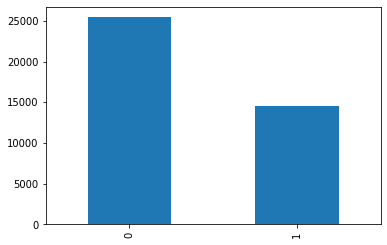

In [16]:
df_train["song_popularity"].value_counts().plot(kind="bar")

# **Checking the correlation among different columns**

In [17]:
corr=df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
id,1.000000,-0.004428,-0.002733,-0.003237,0.000051,0.001087,-0.001492,-0.004756,0.005135,0.002538,0.002792,-0.001297,-0.002199,-0.001016,-0.003074
song_duration_ms,-0.004428,1.000000,-0.166443,-0.061929,0.148531,-0.024337,0.019354,0.033009,0.152954,-0.017211,-0.001236,0.085490,0.021609,-0.006948,-0.003960
acousticness,-0.002733,-0.166443,1.000000,-0.093737,-0.570177,0.072516,-0.186663,-0.124704,-0.532724,0.066973,-0.130244,-0.190964,-0.205307,-0.250310,0.025298
danceability,-0.003237,-0.061929,-0.093737,1.000000,0.099933,-0.146447,0.120514,0.045400,0.200148,0.030289,0.177937,-0.089887,0.016455,0.384496,0.017572
energy,0.000051,0.148531,-0.570177,0.099933,1.000000,-0.120338,0.210176,0.154907,0.643931,-0.094916,0.120053,0.225465,0.238722,0.324626,-0.054640
instrumentalness,0.001087,-0.024337,0.072516,-0.146447,-0.120338,1.000000,-0.054726,-0.033445,-0.181889,-0.003617,-0.053209,-0.010350,-0.047397,-0.157760,-0.009511
key,-0.001492,0.019354,-0.186663,0.120514,0.210176,-0.054726,1.000000,0.077046,0.201509,-0.036252,0.102993,0.053206,0.094144,0.132194,0.017808
liveness,-0.004756,0.033009,-0.124704,0.045400,0.154907,-0.033445,0.077046,1.000000,0.146551,-0.013281,0.076612,0.064425,0.037766,0.084770,0.016571
loudness,0.005135,0.152954,-0.532724,0.200148,0.643931,-0.181889,0.201509,0.146551,1.000000,-0.076893,0.157550,0.173979,0.245403,0.356330,-0.040662
audio_mode,0.002538,-0.017211,0.066973,0.030289,-0.094916,-0.003617,-0.036252,-0.013281,-0.076893,1.000000,0.019790,-0.023202,-0.043714,-0.015683,-0.001455


# **Plotting boxplot to detect outliers in each column**

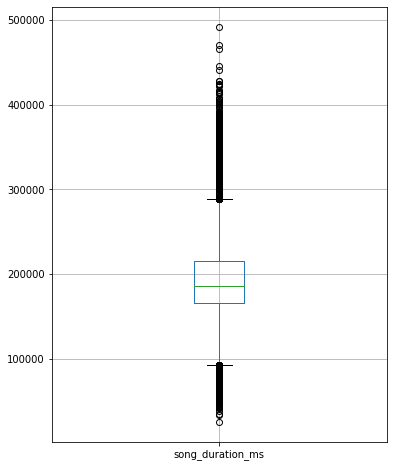

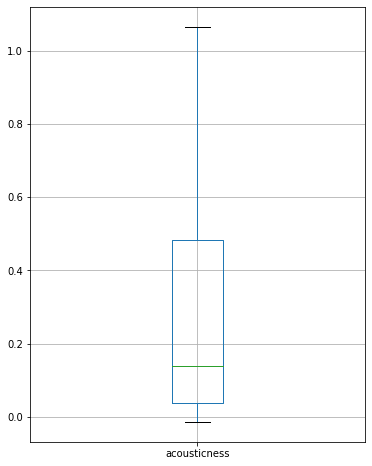

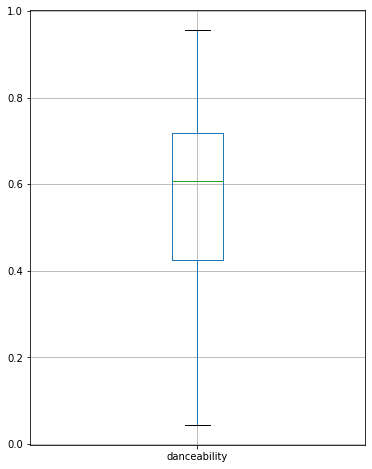

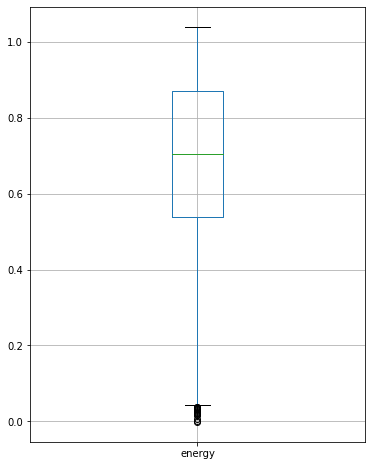

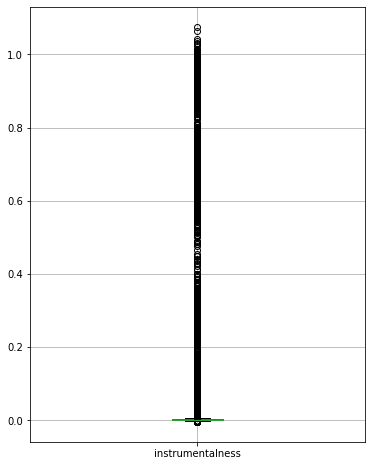

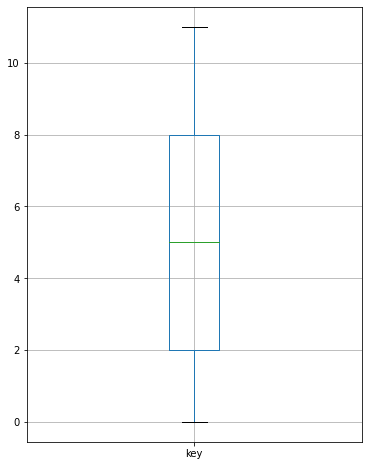

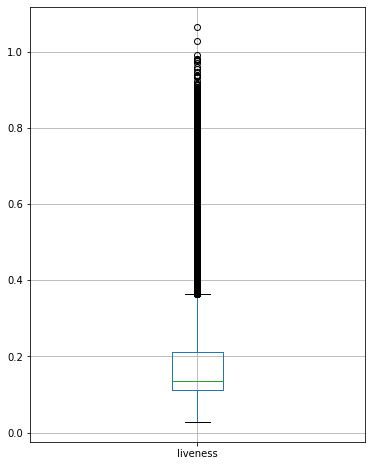

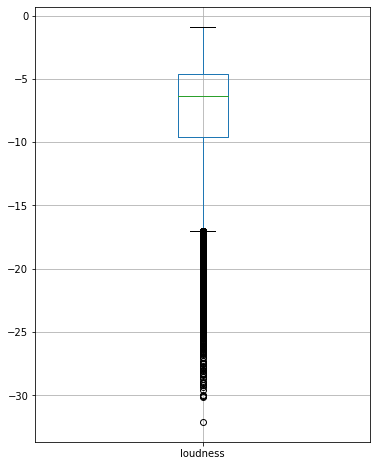

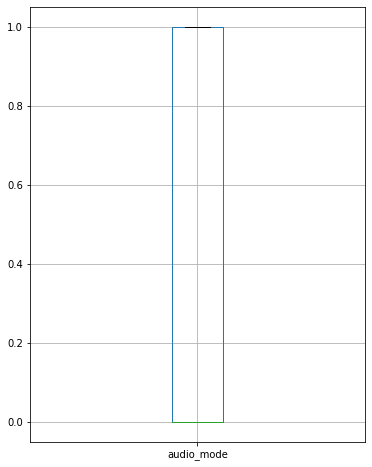

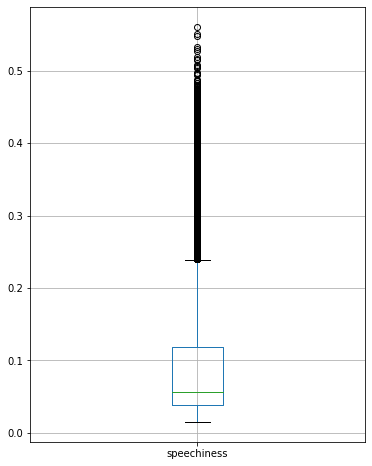

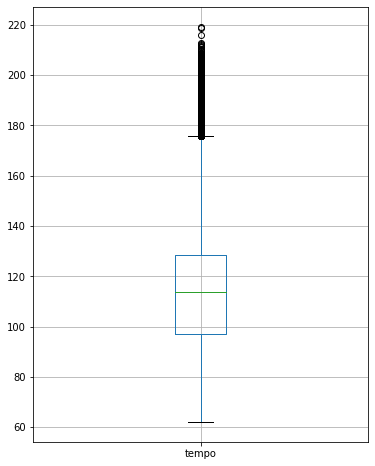

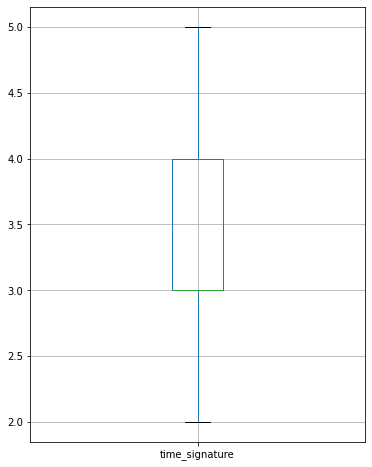

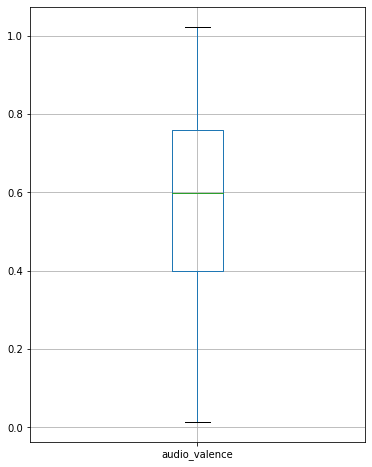

In [18]:
for i in range(1,len(df_test.columns)):
    df_train[[df_train.columns[i]]].boxplot(figsize=(6,8))
    plt.show()

# Processing the dataset
# Removing and imputing null values

In [19]:
qnt = df_train.song_duration_ms.quantile(0.99)
qnt

324508.3799999998

In [20]:
df_train = df_train[df_train['song_duration_ms'] < qnt]

In [21]:
df_train

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0
5,5,188891.0,0.035655,0.825919,0.804528,-0.000005,4.0,0.120758,-6.122926,0,0.039012,115.679128,4,0.709408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,237799.0,NaN,0.748942,0.511234,0.002913,0.0,0.173803,-8.853673,0,0.078060,168.262924,3,0.178159,0
39996,39996,191119.0,0.067488,0.672830,0.889685,0.001225,5.0,0.122924,-7.798993,0,0.188607,110.684544,3,0.790626,0
39997,39997,160879.0,0.877431,0.409065,0.292671,NaN,10.0,0.110664,-15.378585,0,0.031294,99.556074,3,0.177947,1
39998,39998,193918.0,NaN,0.365738,NaN,0.000339,1.0,0.356308,-4.661977,1,0.054096,139.857384,3,0.772978,0


In [22]:
Id = df_test['id']

In [23]:
#Get split marker
split = len(df_train)

In [24]:
#Merging into one dataset
data =  pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

In [25]:
data.drop('id', axis=1, inplace=True)

In [26]:
data

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0.0
1,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0.0
2,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0.0
3,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0.0
4,188891.0,0.035655,0.825919,0.804528,-0.000005,4.0,0.120758,-6.122926,0,0.039012,115.679128,4,0.709408,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45535,196204.0,0.083936,0.823252,0.442246,0.002990,1.0,0.123921,-8.682195,1,0.041171,98.264618,4,0.784104,NaN
45536,218343.0,0.105279,0.683743,0.848627,0.001911,6.0,0.106522,-4.946250,0,0.033605,103.949646,4,0.850754,NaN
45537,188434.0,0.753472,0.783947,0.498261,0.134027,6.0,0.088147,-11.812606,1,0.029526,119.090558,4,0.482961,NaN
45538,173044.0,0.863579,0.373283,0.476142,0.000049,10.0,0.122122,-12.371232,0,0.190628,103.048349,3,0.518742,NaN


<AxesSubplot:xlabel='song_duration_ms', ylabel='Density'>

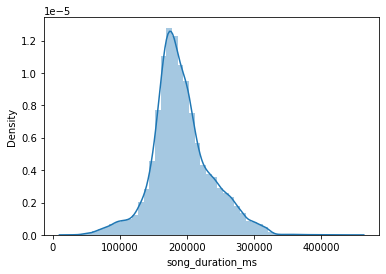

In [27]:
sns.distplot(data['song_duration_ms'].dropna())

In [28]:
median = data['song_duration_ms'].median()
std = data['song_duration_ms'].std()
is_null = data['song_duration_ms'].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size = is_null)
age_slice = data['song_duration_ms'].copy()
age_slice[np.isnan(age_slice)] = rand_age
data['song_duration_ms'] = age_slice
data['song_duration_ms'] = data['song_duration_ms'].astype(int)

In [29]:
data

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,212990,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0.0
1,193213,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0.0
2,249893,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0.0
3,165969,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0.0
4,188891,0.035655,0.825919,0.804528,-0.000005,4.0,0.120758,-6.122926,0,0.039012,115.679128,4,0.709408,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45535,196204,0.083936,0.823252,0.442246,0.002990,1.0,0.123921,-8.682195,1,0.041171,98.264618,4,0.784104,NaN
45536,218343,0.105279,0.683743,0.848627,0.001911,6.0,0.106522,-4.946250,0,0.033605,103.949646,4,0.850754,NaN
45537,188434,0.753472,0.783947,0.498261,0.134027,6.0,0.088147,-11.812606,1,0.029526,119.090558,4,0.482961,NaN
45538,173044,0.863579,0.373283,0.476142,0.000049,10.0,0.122122,-12.371232,0,0.190628,103.048349,3,0.518742,NaN


In [30]:
nan_cols

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness']

In [31]:
data['acousticness'].fillna(data['acousticness'].mode()[0], inplace = True)

In [32]:
data['acousticness'].isnull().sum()

0

In [33]:
data['danceability'].fillna(data['danceability'].mean(), inplace = True)

In [34]:
data['energy'].fillna(data['energy'].mean(), inplace = True)

In [35]:
data['instrumentalness'].fillna(data['instrumentalness'].mean(), inplace = True)

In [36]:
data['key'].fillna(data['key'].mean(), inplace = True)

In [37]:
data['liveness'].fillna(data['liveness'].mean(), inplace = True)

In [38]:
data['loudness'].fillna(data['loudness'].mean(), inplace = True)

In [39]:
df_train.columns

Index(['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

# **Checking the distribution of each column with the target variable**

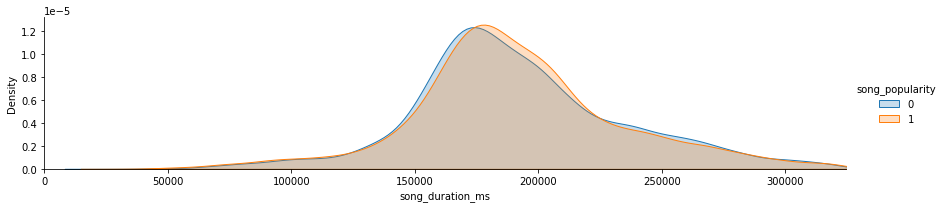

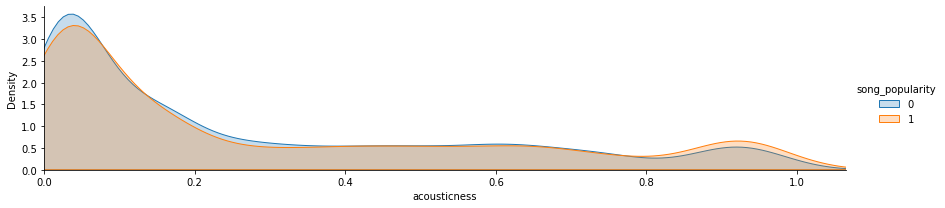

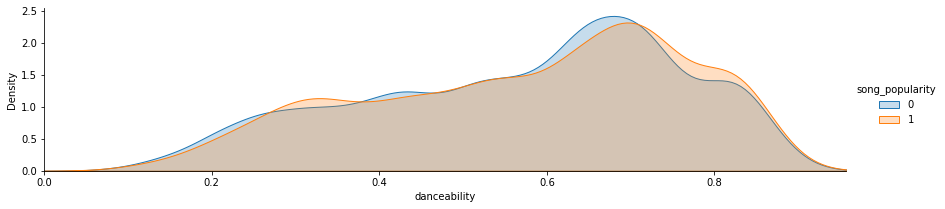

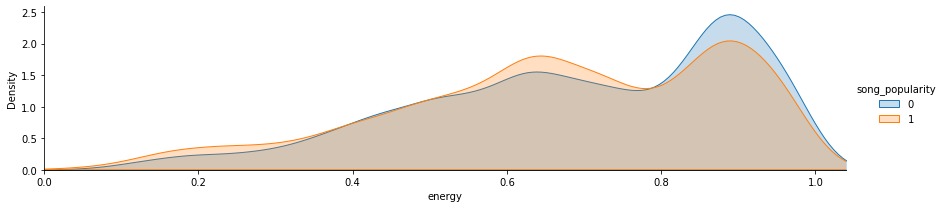

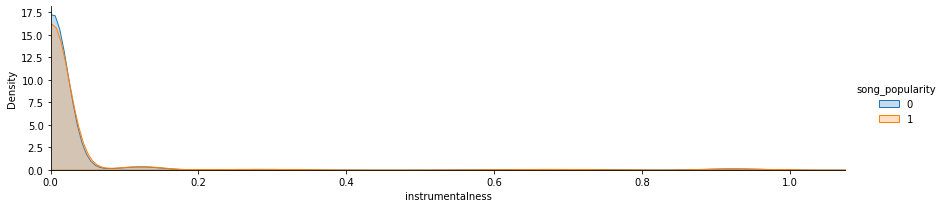

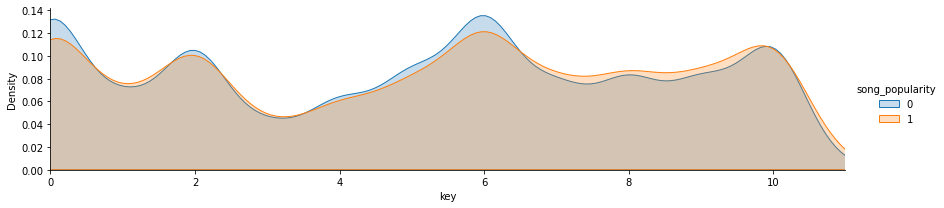

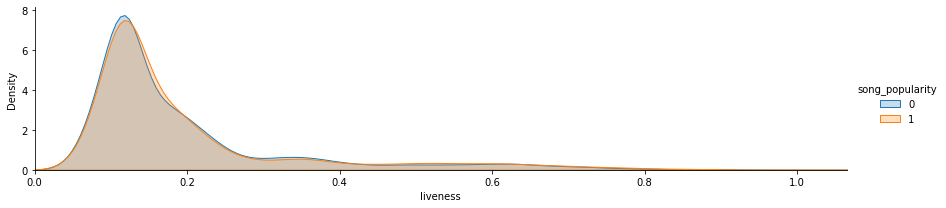

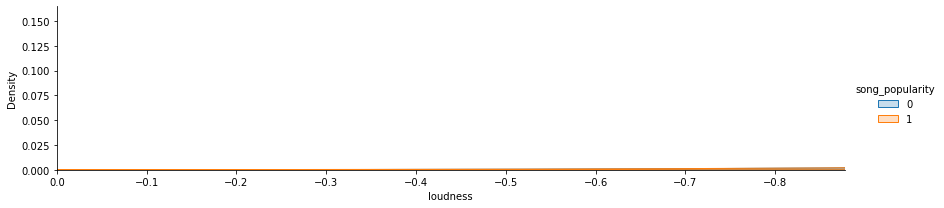

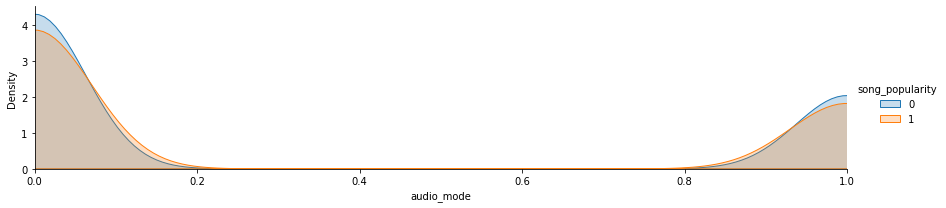

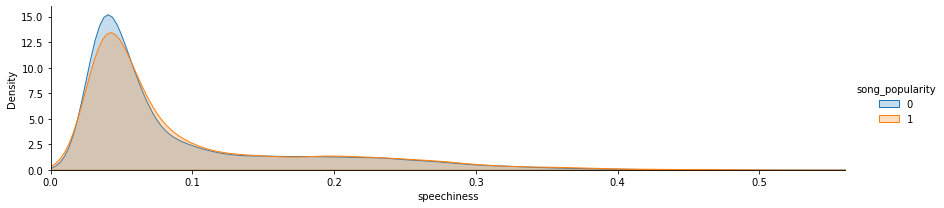

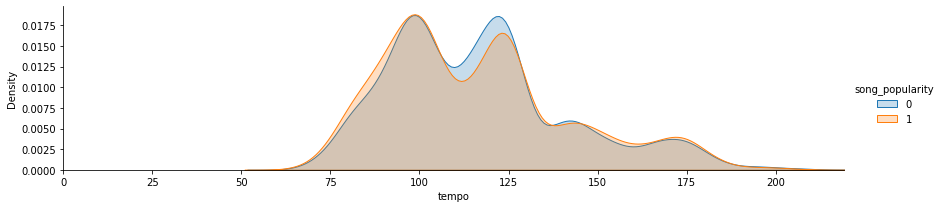

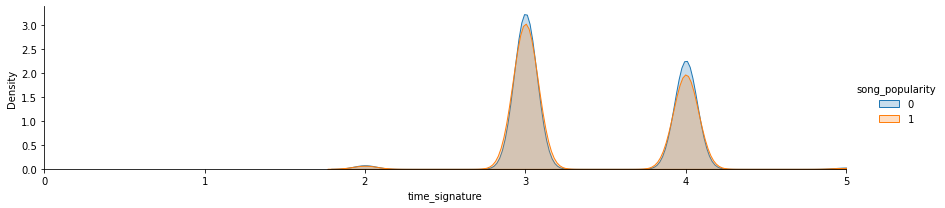

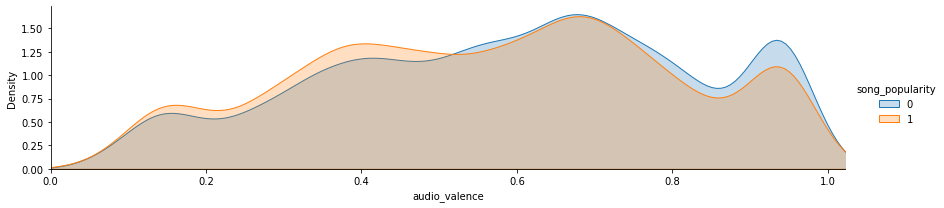

In [40]:
for i in range(1,len(df_test.columns)):
    a = sns.FacetGrid(df_train, hue = 'song_popularity', aspect=4 )
    a.map(sns.kdeplot, df_train.columns[i], shade= True )
    a.set(xlim=(0, df_train[df_train.columns[i]].max()))
    a.add_legend()